# Importing and basic analysis

In [ ]:
!gdown 15M27gosWyUG1I_2wA-czk2bsflbpYbyv

Downloading...
From: https://drive.google.com/uc?id=15M27gosWyUG1I_2wA-czk2bsflbpYbyv
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 50.8MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

np.random.seed(111)

In [ ]:
df = pd.read_csv('/content/walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
data = df['Occupation'].value_counts()

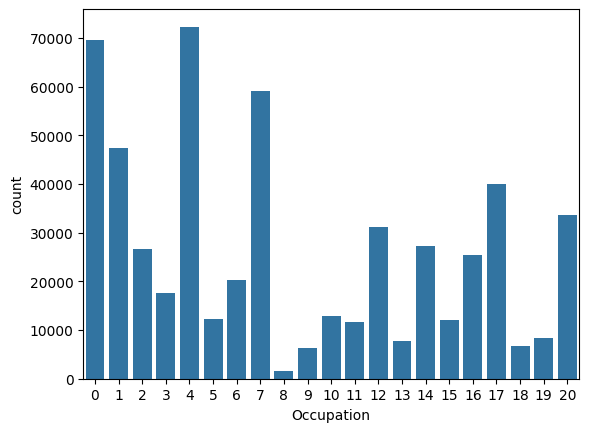

In [ ]:
sns.countplot(data=df, x='Occupation')
plt.show()

In [ ]:
df['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


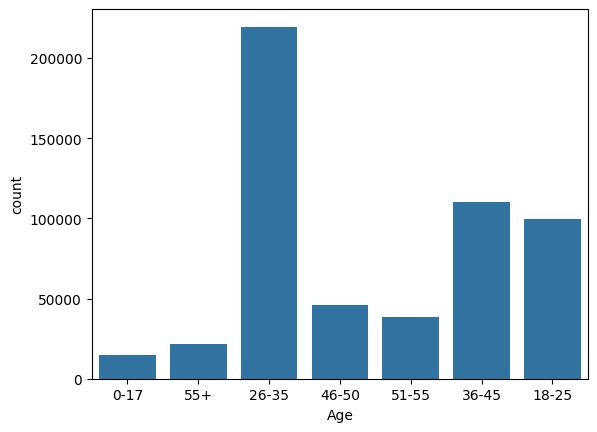

In [ ]:
sns.countplot(data=df, x='Age')
plt.show()

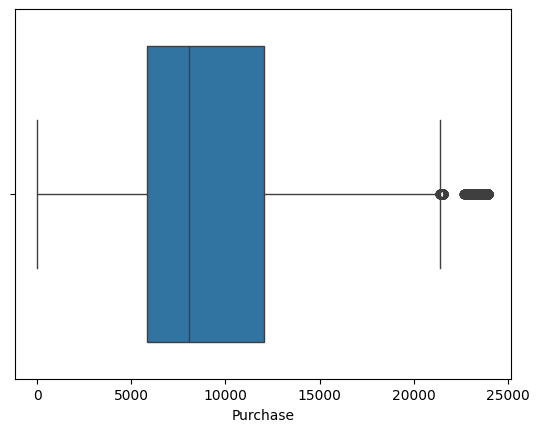

In [ ]:
sns.boxplot(data=df, x='Purchase')
plt.show()

We can see that the Purchase column contains a few high-value outliers.

But for now let's leave the outliers as it is, because purchase is our target feature.

# Data Exploration

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df['Product_Category'].value_counts()

,count
Product_Category,
5,150933
1,140378
8,113925
11,24287
2,23864
6,20466
3,20213
4,11753
16,9828


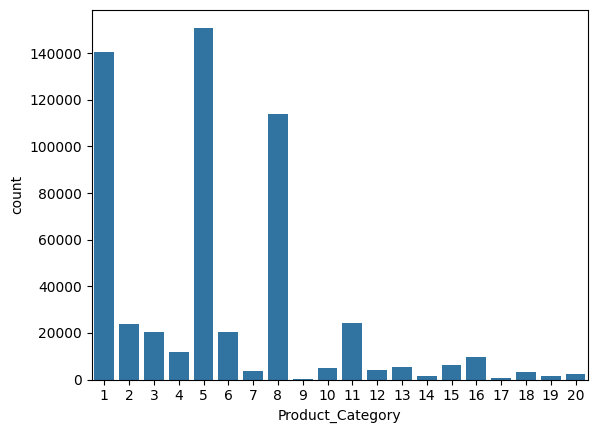

In [ ]:
sns.countplot(data=df, x='Product_Category')
plt.show()

In [ ]:
age_product = pd.crosstab(df['Age'], df['Product_Category'], normalize='index')
age_product

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,
0-17,0.237386,0.053304,0.079460,0.050192,0.286717,0.026420,0.003509,0.149517,0.001059,0.007350,0.049000,0.008277,0.007416,0.002582,0.010595,0.015164,0.000397,0.001788,0.003907,0.005959
18-25,0.270540,0.044431,0.047261,0.024714,0.286193,0.037618,0.004826,0.179721,0.000632,0.006051,0.046127,0.004405,0.007586,0.002308,0.010275,0.016035,0.000411,0.003402,0.002759,0.004706
26-35,0.265266,0.040658,0.034893,0.019090,0.279948,0.038641,0.007519,0.201542,0.000701,0.008138,0.044966,0.004991,0.009545,0.002568,0.010802,0.018753,0.000578,0.004745,0.002564,0.004089
36-45,0.251316,0.044649,0.035032,0.021397,0.267032,0.035441,0.007354,0.211757,0.000973,0.011226,0.045022,0.009035,0.011362,0.002836,0.012680,0.017771,0.001227,0.006381,0.002909,0.004599
46-50,0.229185,0.046060,0.030109,0.021663,0.261942,0.035492,0.007155,0.233168,0.000722,0.011378,0.046038,0.011378,0.012057,0.003260,0.013173,0.019234,0.002079,0.007680,0.003260,0.004967
51-55,0.235033,0.046259,0.023999,0.017610,0.256954,0.037661,0.006909,0.242591,0.000753,0.013480,0.037869,0.011246,0.012545,0.004000,0.013194,0.017454,0.002779,0.010987,0.003480,0.005195
55+,0.205125,0.042085,0.022647,0.014788,0.249581,0.040086,0.006231,0.288690,0.000372,0.016276,0.026088,0.015811,0.013997,0.003488,0.010649,0.017532,0.003116,0.011207,0.004790,0.007440


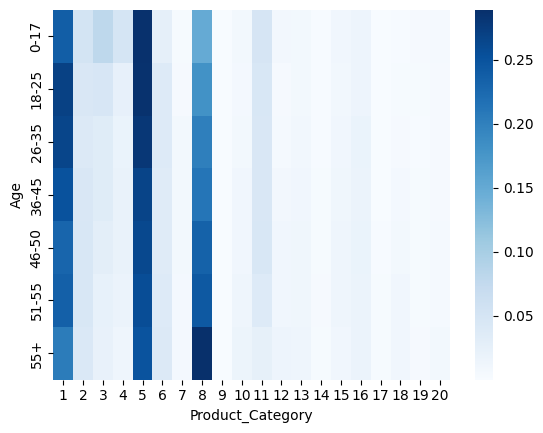

In [ ]:
sns.heatmap(age_product, cmap='Blues')
plt.show()

Well, from the above plots we can see that every age_group majorly buys 3 product_subcategory (1, 5 and 8).

 - Young customers (0–17) show a strong preference for Product 5, followed by Product 1 and Product 8.

 - Adults aged 18–35 also prefer Product 5, but in this group Product 1 is almost equally popular, indicating similar appeal.

 - Older customers (36+) show an increasing preference for Product 8, and this trend becomes strongest in the 55+ age segment, where Product 8 clearly dominates all other categories.

Let's check statistically whether there is an association between age group and product_category.

H0: There is no association between age group and product category.

Ha: There is an association between age group and product category.

In [ ]:
from scipy.stats import chi2_contingency

stats, pvalue, dof, exp_freq = chi2_contingency(pd.crosstab(df['Age'], df['Product_Category']))
stats, pvalue

(np.float64(7637.286550357665), np.float64(0.0))

In [ ]:
if pvalue < 0.05:
  print('Reject the null hypothesis.')
else:
  print('We fail to reject the null hypothesis.')

Reject the null hypothesis.


From the chisquare test(p=0), we rejected the null hypothesis and conclude that there is statistically significant association between age group and product category.

In [ ]:
df.groupby(['Age', 'Marital_Status'])['Purchase'].sum()

Age    Marital_Status
0-17   0                  134913183
18-25  0                  723920602
       1                  189928073
26-35  0                 1233330102
       1                  798440476
36-45  0                  624110760
       1                  402459124
46-50  0                  113658360
       1                  307185043
51-55  0                  103792394
       1                  263307250
55+    0                   75202046
       1                  125565329
Name: Purchase, dtype: int64

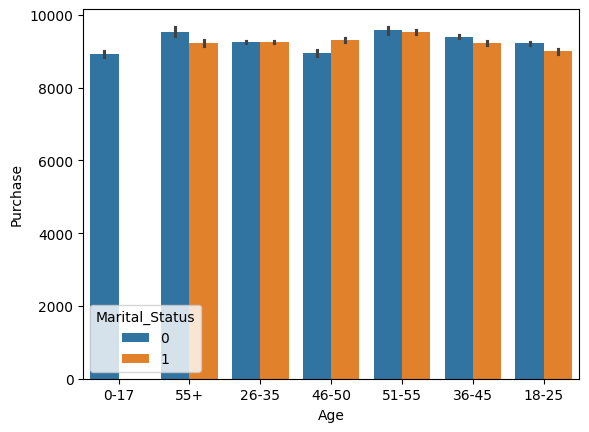

In [ ]:
sns.barplot(data=df, x='Age', y='Purchase', hue='Marital_Status')
plt.show()

To check the association between Age, Marital_Status and Purchase. Let's perform 2-way anova.

H0: There is no association between 2 features.

Ha: there is and association between features.

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

test = ols('Purchase ~ C(Age) * C(Marital_Status)', data=df).fit()
anova_table = anova_lm(test)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Age),6.0,6.140003e+09,1.023334e+09,40.585089,1.025085e-49
C(Marital_Status),1.0,4.487707e+08,4.487707e+08,17.798104,2.456672e-05
C(Age):C(Marital_Status),6.0,2.926696e+09,4.877826e+08,19.345303,1.094289e-22
Residual,550055.0,1.386938e+13,2.521453e+07,NaN,NaN


- Age → Purchase
  
  p-value = 1.02e-49 (extremely small)

  Decision: Reject H₀

  Conclusion: Age has a statistically significant effect on Purchase.



- Marital Status → Purchase

  p-value = 2.45e-05

  Decision: Reject H₀

  Conclusion: Marital status also has a significant effect on Purchase.

  

- Interaction: Age × Marital Status

  p-value = 1.09e-22

  Decision: Reject H₀

  Conclusion:
  There is a significant interaction between Age and Marital Status

In [ ]:
df['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


In [ ]:
gender_product = pd.crosstab(df['Gender'], df['Product_Category'])
gender_product

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,
F,24831,5658,6006,3639,41961,4559,943,33558,70,1162,4739,1532,1462,623,1046,2402,62,382,451,723
M,115547,18206,14207,8114,108972,15907,2778,80367,340,3963,19548,2415,4087,900,5244,7426,516,2743,1152,1827


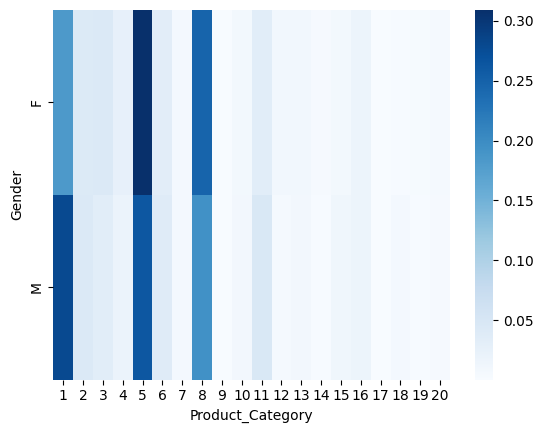

In [ ]:
sns.heatmap(pd.crosstab(df['Gender'], df['Product_Category'], normalize='index'), cmap='Blues')
plt.show()

It seems from the plot that Female customers prefer "product_cat 5" and male custoemers prefer "product_cat 1" more

Let's check with statistics,

H0: Gender do not associate with Product_Category.

Ha: There is an association between Gender and Product_category

In [ ]:
from scipy.stats import chi2_contingency

stats, pvalue, dof, exp_freq = chi2_contingency(gender_product.values)
stats, pvalue

(np.float64(8070.411022236562), np.float64(0.0))

In [ ]:
if pvalue < 0.05:
  print('Reject the null hypothesis.')
else:
  print('We fail to reject the null hypothesis.')

Reject the null hypothesis.


Therefore, from chisquare test we can conclude that there is statistically significant association between gender and product_category.

# Gender and the amount spend. (CLT)

First, let us define the function we are going to use.

In [ ]:
def clt_theor(data, sample_size):
  std_error = data.std() / np.sqrt(sample_size)
  z_score = norm.ppf(0.975)
  ci_min = np.round(data.mean() - (z_score * std_error), 2)
  ci_max = np.round(data.mean() + (z_score * std_error), 2)
  print(f'Mean of data: {np.round(data.mean(), 2)}')
  print(f'Confidence Interval 95% of mean: ({ci_min}, {ci_max})')
  print(f'CI width: {np.round(ci_max - ci_min, 2)}')

In [ ]:
def clt_sim(data, sample_size):
  clt_mean = []
  for _ in range(10000):
    clt_sample = np.random.choice(data, size=sample_size, replace=True)
    clt_mean.append(clt_sample.mean())

  clt_mean_mean = np.mean(clt_mean)
  clt_mean_std = np.std(clt_mean)
  z_score = norm.ppf(0.975)
  ci_min = np.round(np.percentile(clt_mean, 2.5), 2)
  ci_max = np.round(np.percentile(clt_mean, 97.5), 2)
  print(f'Mean of data: {np.round(clt_mean_mean, 2)}')
  print(f'Confidence Interval 95% of mean: ({ci_min}, {ci_max})')
  print(f'CI width: {np.round(ci_max - ci_min, 2)}')
  sns.histplot(data=clt_mean, bins=50)
  plt.show()

Now, let's do analysis on the distribution of gender based purchasing amount.

In [ ]:
df_male_purchase = df[df['Gender']=='M']['Purchase']
df_female_purchase = df[df['Gender']=='F']['Purchase']

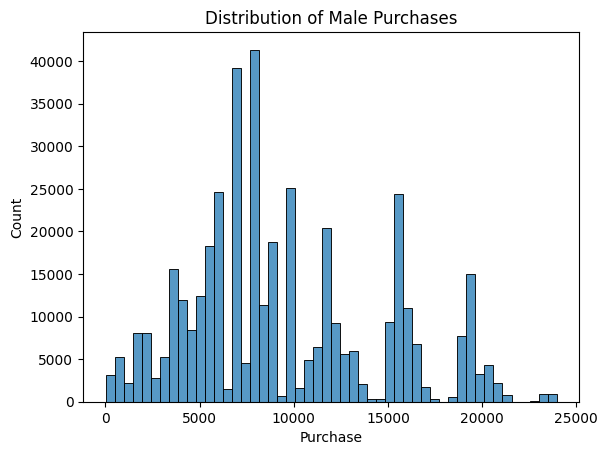

In [ ]:
plt.title('Distribution of Male Purchases')
sns.histplot(data=df_male_purchase, bins=50)
plt.show()

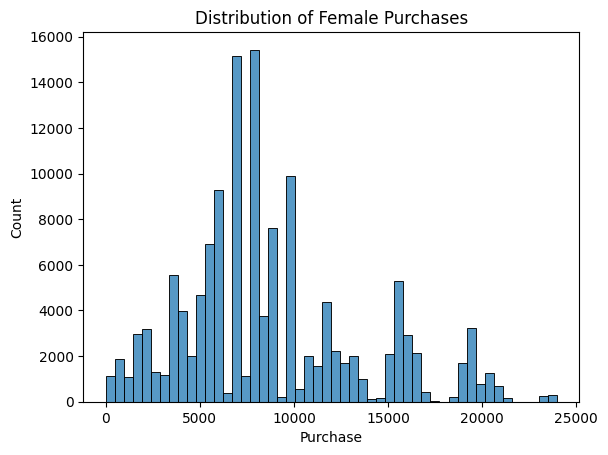

In [ ]:
plt.title('Distribution of Female Purchases')
sns.histplot(data=df_female_purchase, bins=50)
plt.show()

Let's get some details about the distribution:

In [ ]:
print('Male Purchases mean: ', np.round(df_male_purchase.mean(), 2))
print('Female Purchases mean:', np.round(df_female_purchase.mean(), 2))

Male Purchases mean:  9437.53
Female Purchases mean: 8734.57


In [ ]:
print('Male Purchases median:', np.round(df_male_purchase.median(), 2))
print('Female Purchases median:', np.round(df_female_purchase.median(), 2))

Male Purchases median: 8098.0
Female Purchases median: 7914.0


In [ ]:
print('Male Purchases standard deviation: ',np.round(df_male_purchase.std(), 2))
print('Female Purchases standard deviation',np.round(df_female_purchase.std(), 2))

Male Purchases standard deviation:  5092.19
Female Purchases standard deviation 4767.23


Let's also check the skewneess of the data:

In [ ]:
print('Male Purchases skewness:',np.round(df_male_purchase.skew(), 2))
print('Female Purchases skewness:', np.round(df_female_purchase.skew(), 2))

Male Purchases skewness: 0.55
Female Purchases skewness: 0.75


Both of the distributions are right(positive) skewed, but female purchase distribution is more skewed statistically.

In [ ]:
print(f'95% of male purchases are between: ({np.round(np.percentile(df_male_purchase, 2.5), 2)}, {np.round(np.percentile(df_male_purchase, 97.5), 2)})')
print(f'95% of female purchases are between: ({np.round(np.percentile(df_female_purchase, 2.5), 2)}, {np.round(np.percentile(df_female_purchase, 97.5), 2)})')


95% of male purchases are between: (1436.0, 19925.0)
95% of female purchases are between: (1376.0, 19648.0)


In [ ]:
print(f'CI width of male purchases: {np.round(np.percentile(df_male_purchase, 97.5), 2) - np.round(np.percentile(df_male_purchase, 2.5), 2)}')
print(f'CI width of female purchases: {np.round(np.percentile(df_female_purchase, 97.5), 2) - np.round(np.percentile(df_female_purchase, 2.5), 2)}')

CI width of male purchases: 18489.0
CI width of female purchases: 18272.0


Now, lets check the 95% confidence interval of mean for both of the distributions:

##Bootstrapping

First, check with bootstrapping, i.e. in clt_sim function we will use sample size = len(data).

Mean of data: 8734.36
Confidence Interval 95% of mean: (8708.54, 8759.39)
CI width: 50.85


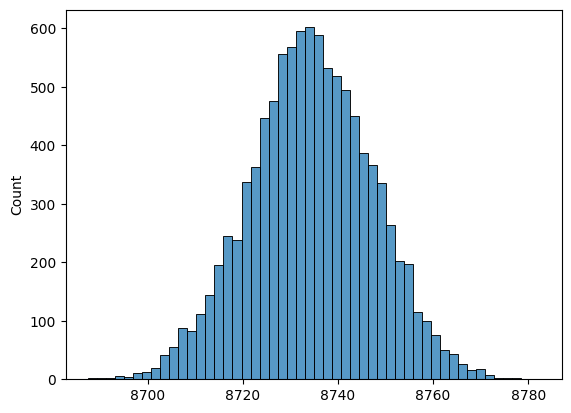

In [ ]:
clt_sim(df_female_purchase, len(df_female_purchase))

In [ ]:
clt_theor(df_female_purchase, len(df_female_purchase))

Mean of data: 8734.57
Confidence Interval 95% of mean: (8709.21, 8759.92)
CI width: 50.71


Mean of data: 9437.53
Confidence Interval 95% of mean: (9422.17, 9452.8)
CI width: 30.63


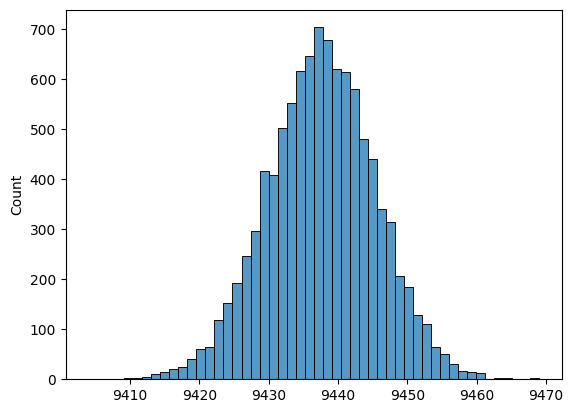

In [ ]:
clt_sim(df_male_purchase, len(df_male_purchase))

In [ ]:
clt_theor(df_male_purchase, len(df_male_purchase))

Mean of data: 9437.53
Confidence Interval 95% of mean: (9422.02, 9453.03)
CI width: 31.01


##CLT sample_size=300

Mean of data: 8733.63
Confidence Interval 95% of mean: (8202.68, 9279.54)
CI width: 1076.86


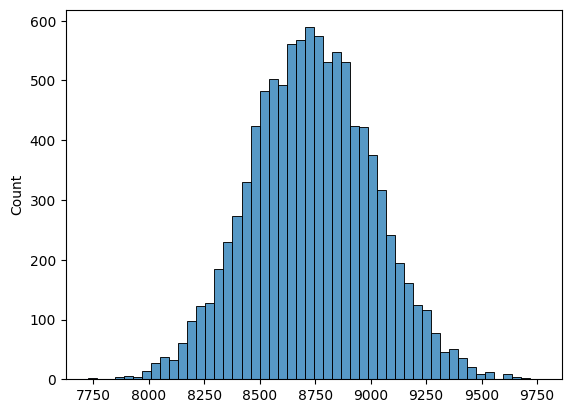

In [ ]:
clt_sim(df_female_purchase, 300)

In [ ]:
clt_theor(df_female_purchase, 300)

Mean of data: 8734.57
Confidence Interval 95% of mean: (8195.11, 9274.02)
CI width: 1078.91


Mean of data: 9437.22
Confidence Interval 95% of mean: (8863.41, 10017.84)
CI width: 1154.43


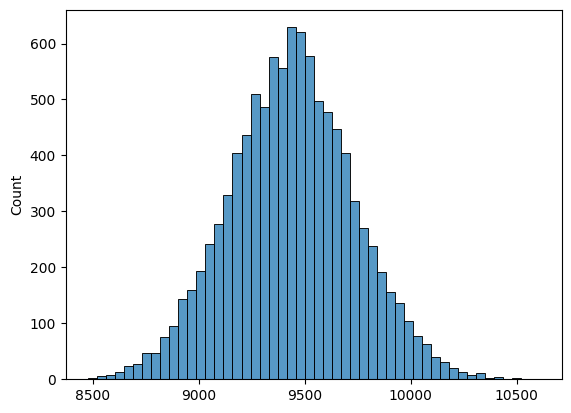

In [ ]:
clt_sim(df_male_purchase, 300)

In [ ]:
clt_theor(df_male_purchase, 300)

Mean of data: 9437.53
Confidence Interval 95% of mean: (8861.3, 10013.75)
CI width: 1152.45


##CLT sample_size=3000

Mean of data: 8734.73
Confidence Interval 95% of mean: (8564.87, 8907.62)
CI width: 342.75


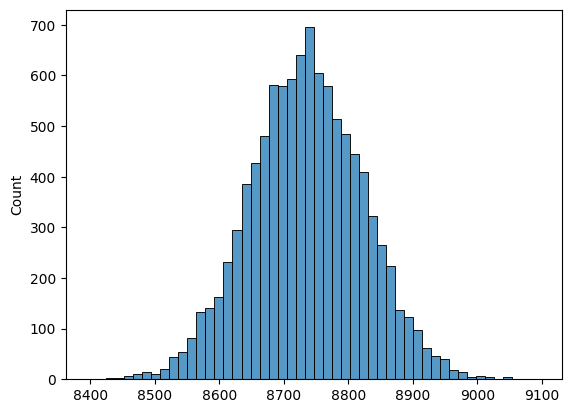

In [ ]:
clt_sim(df_female_purchase, 3000)

In [ ]:
clt_theor(df_female_purchase, 3000)

Mean of data: 8734.57
Confidence Interval 95% of mean: (8563.98, 8905.16)
CI width: 341.18


Mean of data: 9437.19
Confidence Interval 95% of mean: (9257.41, 9622.88)
CI width: 365.47


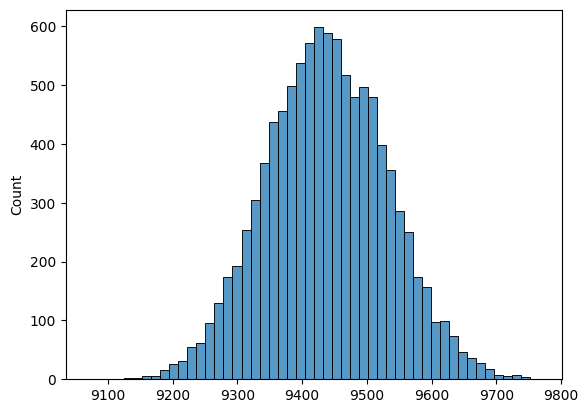

In [ ]:
clt_sim(df_male_purchase, 3000)

In [ ]:
clt_theor(df_male_purchase, 3000)

Mean of data: 9437.53
Confidence Interval 95% of mean: (9255.31, 9619.74)
CI width: 364.43


##CLT sample_size=30000

Mean of data: 8734.24
Confidence Interval 95% of mean: (8680.49, 8788.0)
CI width: 107.51


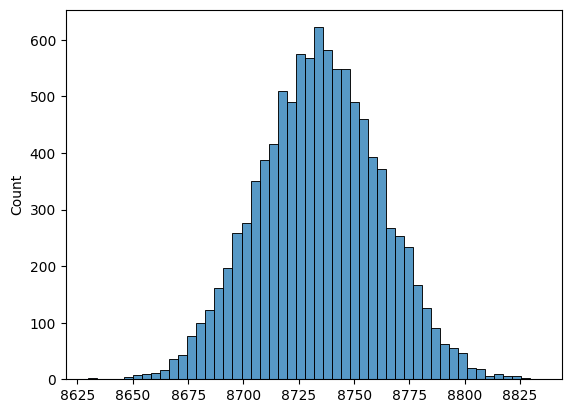

In [ ]:
clt_sim(df_female_purchase, 30000)

In [ ]:
clt_theor(df_female_purchase, 30000)

Mean of data: 8734.57
Confidence Interval 95% of mean: (8680.62, 8788.51)
CI width: 107.89


Mean of data: 9438.14
Confidence Interval 95% of mean: (9380.19, 9496.49)
CI width: 116.3


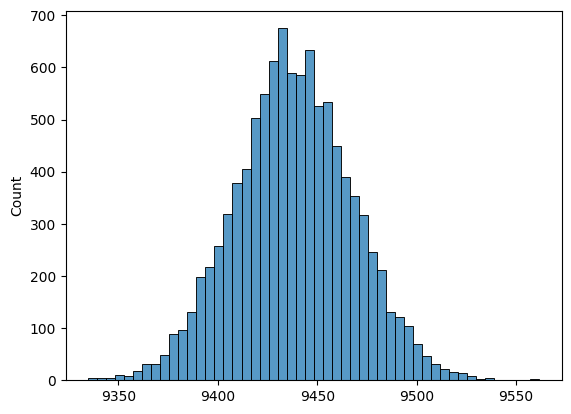

In [ ]:
clt_sim(df_male_purchase, 30000)

In [ ]:
clt_theor(df_male_purchase, 30000)

Mean of data: 9437.53
Confidence Interval 95% of mean: (9379.9, 9495.15)
CI width: 115.25


From the above calculated CLT, observation are:

 - Confidence interval widths shrink as sample size increases.
This aligns with the Central Limit Theorem: larger samples reduce sampling variability, making our estimate of the population mean more precise.

- Across all sample sizes, the CI widths for male and female customers are similar, indicating comparable variability in purchase amounts between genders.
However, male purchase distributions consistently show slightly wider intervals, suggesting marginally higher variance in male purchase behavior.

- As sample size increases, the sampling distribution becomes narrower and more sharply peaked, reflecting reduced spread and stronger convergence toward the population mean.

##Summary:

- **Male customers have a higher average purchase amount than female customers.**
- The 95% confidence intervals for males and females do not overlap when using the full dataset, indicating a statistically significant difference in spending.
In the CLT-300 case, the intervals become much wider due to the small sample size, but even then, the means still do not fall within each other's intervals, reinforcing that the difference is genuine.

- This clearly shows that male customers spend more than female customers during the Black Friday sale.

How can Walmart leverage this:
- Targeted Male Upselling:
Since male customers spend more on average, Walmart can push high-value categories (electronics, appliances, premium brands) toward this group.

- Female-focused Promotions:
Because women spend less on average, Walmart can design targeted loyalty programs or bundle offers for female shoppers to increase basket size.

- Category Personalization:
Earlier chi-square analysis shows women prefer Product Category 5, while men prefer Category 1.
Combine this with spend patterns to optimize product placement, deals, and in-app recommendations.

# Marital_Status and the amount spent.(CLT)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df_married = df[df['Marital_Status']==1]['Purchase']
df_unmarried = df[df['Marital_Status']==0]['Purchase']

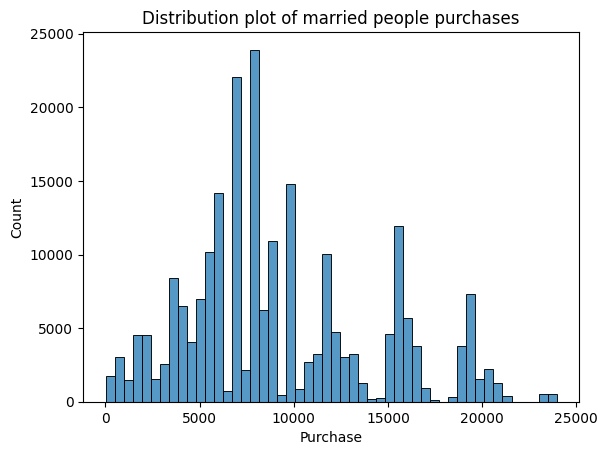

In [ ]:
plt.title('Distribution plot of married people purchases')
sns.histplot(df_married, bins=50)
plt.show()

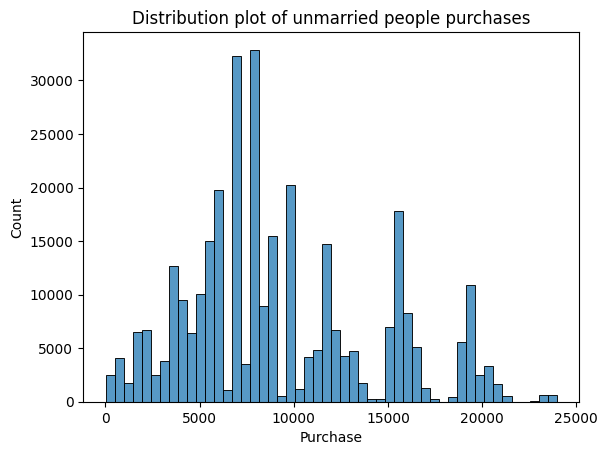

In [ ]:
plt.title('Distribution plot of unmarried people purchases')
sns.histplot(df_unmarried, bins=50)
plt.show()

Let's get some details about the distribution:

In [ ]:
print('Married Purchases mean: ', np.round(df_married.mean(), 2))
print('Unmarried Purchases mean:', np.round(df_unmarried.mean(), 2))

Married Purchases mean:  9261.17
Unmarried Purchases mean: 9265.91


In [ ]:
print('Married Purchases median:', np.round(df_married.median(), 2))
print('Unmarried Purchases median:', np.round(df_unmarried.median(), 2))

Married Purchases median: 8051.0
Unmarried Purchases median: 8044.0


In [ ]:
print('Married Purchases standard deviation: ',np.round(df_married.std(), 2))
print('Unmarried Purchases standard deviation',np.round(df_unmarried.std(), 2))

Married Purchases standard deviation:  5016.9
Unmarried Purchases standard deviation 5027.35


Let's also check the skewneess of the data:

In [ ]:
print('Married Purchases skewness:',np.round(df_male_purchase.skew(), 2))
print('Unmarried Purchases skewness:', np.round(df_female_purchase.skew(), 2))

Married Purchases skewness: 0.55
Unmarried Purchases skewness: 0.75


Both of the distributions are right(positive) skewed, but unmarried purchase distribution is more skewed statistically.

In [ ]:
print(f'95% of married purchases are between: ({np.round(np.percentile(df_married, 2.5), 2)}, {np.round(np.percentile(df_male_purchase, 97.5), 2)})')
print(f'95% of unmarried purchases are between: ({np.round(np.percentile(df_unmarried, 2.5), 2)}, {np.round(np.percentile(df_female_purchase, 97.5), 2)})')


95% of married purchases are between: (1399.0, 19925.0)
95% of unmarried purchases are between: (1429.0, 19648.0)


In [ ]:
print(f'CI width of married purchases: {np.round(np.percentile(df_male_purchase, 97.5), 2) - np.round(np.percentile(df_male_purchase, 2.5), 2)}')
print(f'CI width of unmarried purchases: {np.round(np.percentile(df_female_purchase, 97.5), 2) - np.round(np.percentile(df_female_purchase, 2.5), 2)}')

CI width of married purchases: 18489.0
CI width of unmarried purchases: 18272.0


Now, lets check the 95% confidence interval of mean for both of the distributions:

##Bootstrapping

First, check with bootstrapping, i.e. in clt_sim function we will use sample size = len(data).

Mean of data: 9261.26
Confidence Interval 95% of mean: (9240.63, 9282.03)
CI width: 41.4


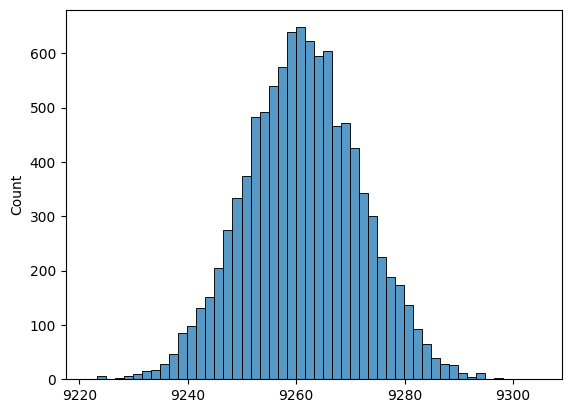

In [ ]:
clt_sim(df_married, len(df_married))

In [ ]:
clt_theor(df_married, len(df_married))

Mean of data: 9261.17
Confidence Interval 95% of mean: (9240.46, 9281.89)
CI width: 41.43


Mean of data: 9265.93
Confidence Interval 95% of mean: (9248.38, 9283.89)
CI width: 35.51


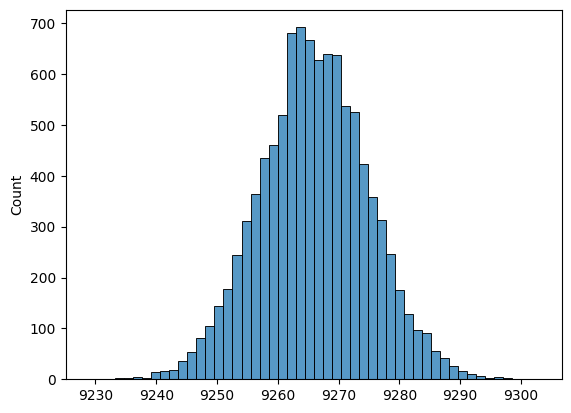

In [ ]:
clt_sim(df_unmarried, len(df_unmarried))

In [ ]:
clt_theor(df_unmarried, len(df_unmarried))

Mean of data: 9265.91
Confidence Interval 95% of mean: (9248.62, 9283.2)
CI width: 34.58


##CLT sample_size=300

Mean of data: 9256.83
Confidence Interval 95% of mean: (8694.89, 9843.7)
CI width: 1148.81


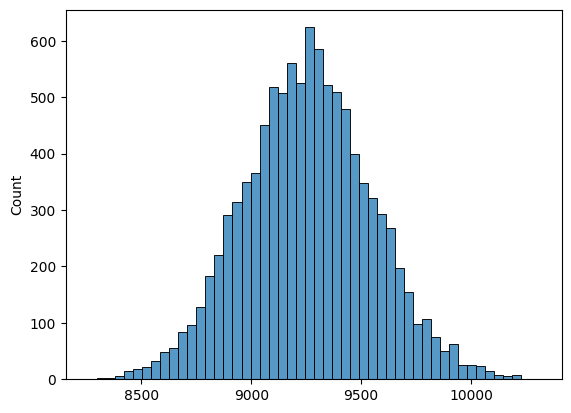

In [ ]:
clt_sim(df_married, 300)

In [ ]:
clt_theor(df_married, 300)

Mean of data: 9261.17
Confidence Interval 95% of mean: (8693.47, 9828.88)
CI width: 1135.41


Mean of data: 9268.58
Confidence Interval 95% of mean: (8696.13, 9836.5)
CI width: 1140.37


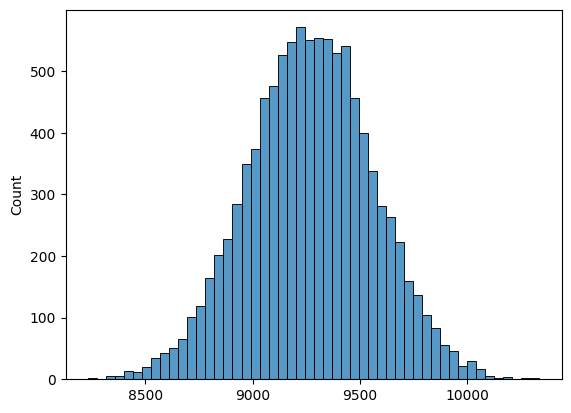

In [ ]:
clt_sim(df_unmarried, 300)

In [ ]:
clt_theor(df_unmarried, 300)

Mean of data: 9265.91
Confidence Interval 95% of mean: (8697.02, 9834.8)
CI width: 1137.78


##CLT sample_size=3000

Mean of data: 9262.34
Confidence Interval 95% of mean: (9082.59, 9442.01)
CI width: 359.42


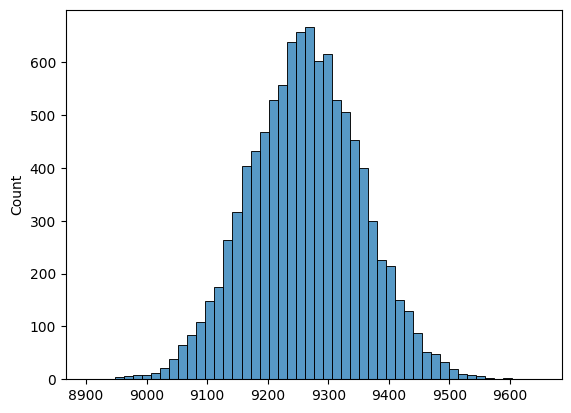

In [ ]:
clt_sim(df_married, 3000)

In [ ]:
clt_theor(df_married, 3000)

Mean of data: 9261.17
Confidence Interval 95% of mean: (9081.65, 9440.7)
CI width: 359.05


Mean of data: 9267.94
Confidence Interval 95% of mean: (9089.97, 9448.8)
CI width: 358.83


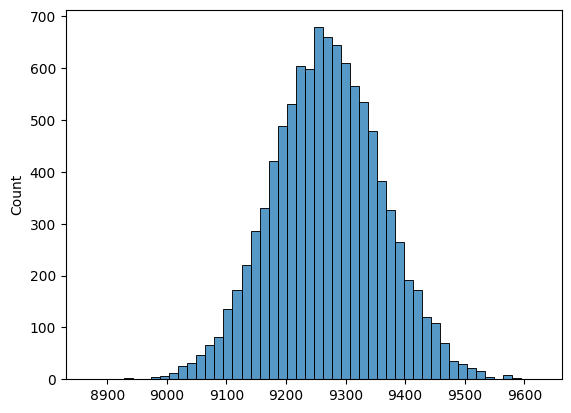

In [ ]:
clt_sim(df_unmarried, 3000)

In [ ]:
clt_theor(df_unmarried, 3000)

Mean of data: 9265.91
Confidence Interval 95% of mean: (9086.01, 9445.81)
CI width: 359.8


##CLT sample_size=30000

Mean of data: 9261.24
Confidence Interval 95% of mean: (9206.54, 9317.93)
CI width: 111.39


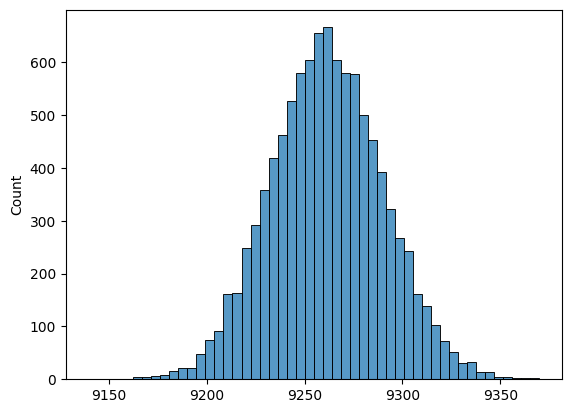

In [ ]:
clt_sim(df_married, 30000)

In [ ]:
clt_theor(df_married, 30000)

Mean of data: 9261.17
Confidence Interval 95% of mean: (9204.4, 9317.95)
CI width: 113.55


Mean of data: 9266.21
Confidence Interval 95% of mean: (9209.45, 9322.68)
CI width: 113.23


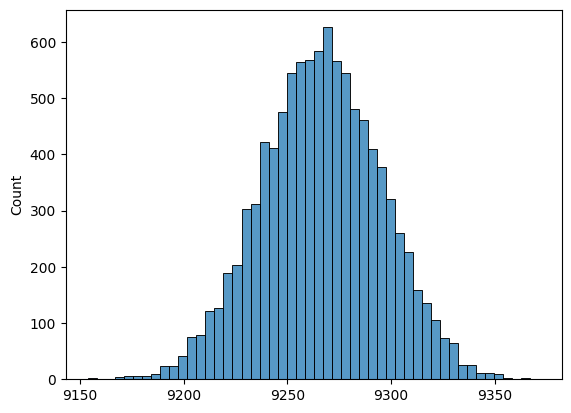

In [ ]:
clt_sim(df_unmarried, 30000)

In [ ]:
clt_theor(df_unmarried, 30000)

Mean of data: 9265.91
Confidence Interval 95% of mean: (9209.02, 9322.8)
CI width: 113.78


The CI of married and unmarried people purchases overlap almost completely in every distribution.

**We can interpret this result to mean that marital status does not significantly affect purchase patterns.**

How can Walmart leverage this:
- Marital status does NOT strongly influence spending.
Walmart should not rely on marital status alone for revenue-focused targeting.

- Combine marital status with other demographics.
The ANOVA results (Age × Marital_Status interaction significant) show:
→ marital status matters only when combined with age.
Walmart can create micro-segments.

# Age and the amount spent.(CLT)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [ ]:
df_17 = df[df['Age']=='0-17']['Purchase']
df_25 = df[df['Age']=='18-25']['Purchase']
df_35 = df[df['Age']=='26-35']['Purchase']
df_45 = df[df['Age']=='36-45']['Purchase']
df_50 = df[df['Age']=='46-50']['Purchase']
df_55 = df[df['Age']=='51-55']['Purchase']
df_55_more = df[df['Age']=='55+']['Purchase']

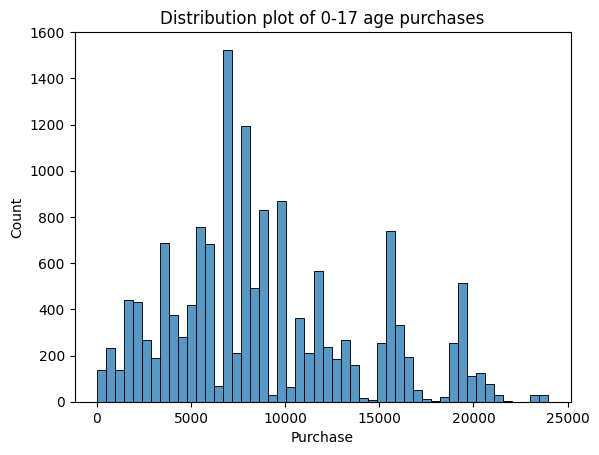

In [ ]:
plt.title('Distribution plot of 0-17 age purchases')
sns.histplot(df_17, bins=50)
plt.show()

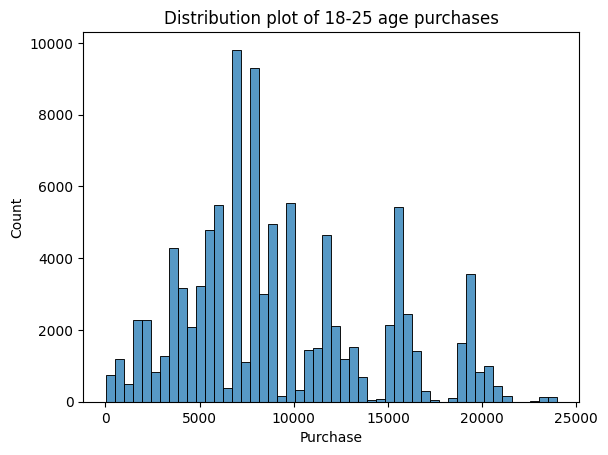

In [ ]:
plt.title('Distribution plot of 18-25 age purchases')
sns.histplot(df_25, bins=50)
plt.show()

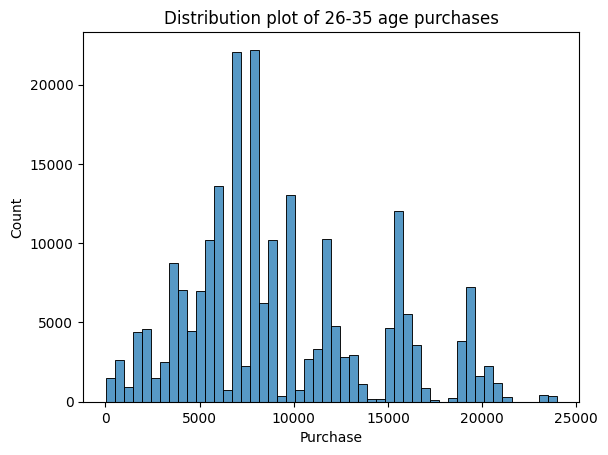

In [ ]:
plt.title('Distribution plot of 26-35 age purchases')
sns.histplot(df_35, bins=50)
plt.show()

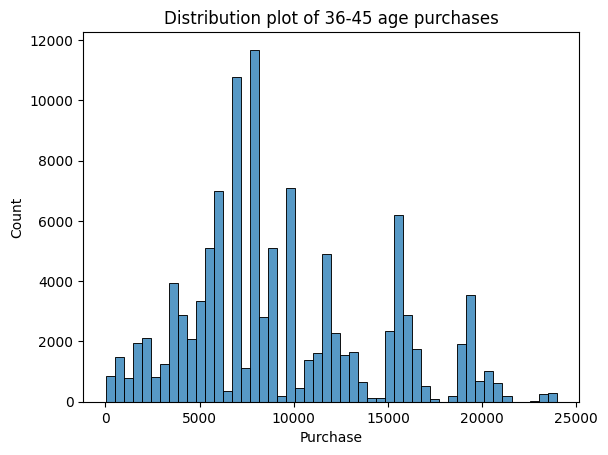

In [ ]:
plt.title('Distribution plot of 36-45 age purchases')
sns.histplot(df_45, bins=50)
plt.show()

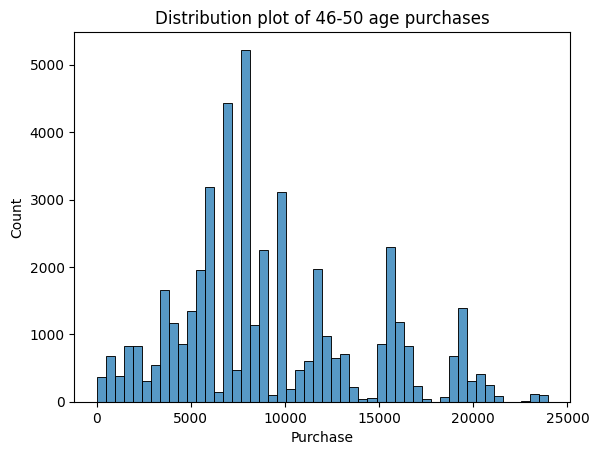

In [ ]:
plt.title('Distribution plot of 46-50 age purchases')
sns.histplot(df_50, bins=50)
plt.show()

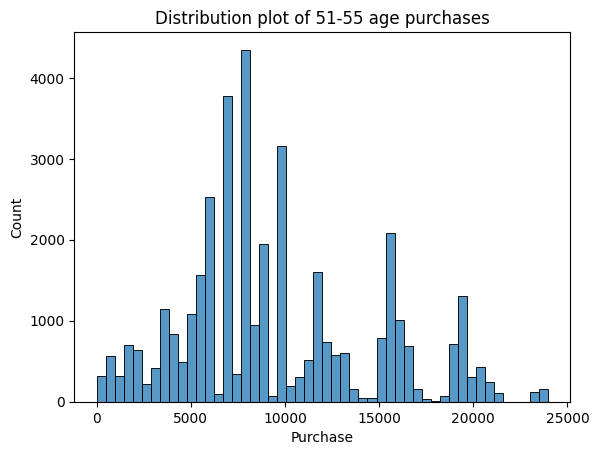

In [ ]:
plt.title('Distribution plot of 51-55 age purchases')
sns.histplot(df_55, bins=50)
plt.show()

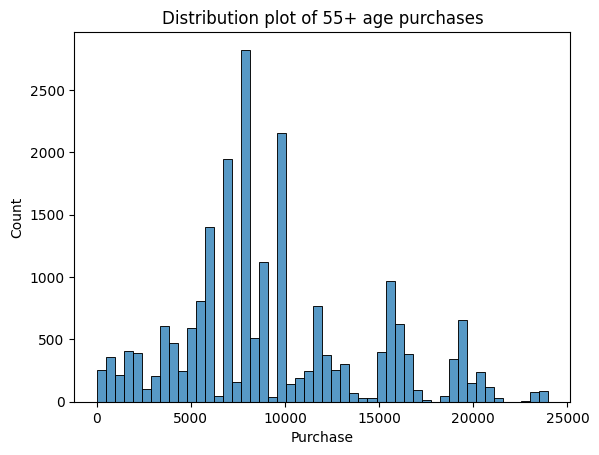

In [ ]:
plt.title('Distribution plot of 55+ age purchases')
sns.histplot(df_55_more, bins=50)
plt.show()

Let's get some details about the distribution:

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
for col in df['Age'].unique():
  print(f'{col} Purchase mean: ', np.round(np.mean(df[df['Age']==col]['Purchase'])))
  print(f'{col} Purchase median: ', np.round(np.median(df[df['Age']==col]['Purchase'])))
  print(f'{col} Purchase standard deviation: ', np.round(np.std(df[df['Age']==col]['Purchase'])))
  print(f'{col} Purchase skewness: ', np.round(df[df['Age']==col]['Purchase'].skew(), 2))
  print()

0-17 Purchase mean:  8933.0
0-17 Purchase median:  7986.0
0-17 Purchase standard deviation:  5111.0
0-17 Purchase skewness:  0.6

55+ Purchase mean:  9336.0
55+ Purchase median:  8106.0
55+ Purchase standard deviation:  5011.0
55+ Purchase skewness:  0.61

26-35 Purchase mean:  9253.0
26-35 Purchase median:  8030.0
26-35 Purchase standard deviation:  5011.0
26-35 Purchase skewness:  0.61

46-50 Purchase mean:  9209.0
46-50 Purchase median:  8036.0
46-50 Purchase standard deviation:  4967.0
46-50 Purchase skewness:  0.62

51-55 Purchase mean:  9535.0
51-55 Purchase median:  8130.0
51-55 Purchase standard deviation:  5087.0
51-55 Purchase skewness:  0.58

36-45 Purchase mean:  9331.0
36-45 Purchase median:  8061.0
36-45 Purchase standard deviation:  5023.0
36-45 Purchase skewness:  0.58

18-25 Purchase mean:  9170.0
18-25 Purchase median:  8027.0
18-25 Purchase standard deviation:  5034.0
18-25 Purchase skewness:  0.59



In [ ]:
for col in df['Age'].unique():
  print(f'95% of {col} purchases are between: ({np.round(np.percentile(df[df['Age']==col]['Purchase'], 2.5), 2)}, {np.round(np.percentile(df[df['Age']==col]['Purchase'], 97.5), 2)})')
  print(f'CI width of {col} purchases: {np.round(np.percentile(df[df['Age']==col]['Purchase'], 97.5), 2) - np.round(np.percentile(df[df['Age']==col]['Purchase'], 2.5), 2)}')
  print()

95% of 0-17 purchases are between: (1051.58, 19669.47)
CI width of 0-17 purchases: 18617.89

95% of 55+ purchases are between: (932.0, 20176.12)
CI width of 55+ purchases: 19244.12

95% of 26-35 purchases are between: (1513.65, 19698.0)
CI width of 26-35 purchases: 18184.35

95% of 46-50 purchases are between: (1076.0, 19698.0)
CI width of 46-50 purchases: 18622.0

95% of 51-55 purchases are between: (1080.5, 20228.5)
CI width of 51-55 purchases: 19148.0

95% of 36-45 purchases are between: (1392.0, 19703.0)
CI width of 36-45 purchases: 18311.0

95% of 18-25 purchases are between: (1464.48, 19673.0)
CI width of 18-25 purchases: 18208.52



Now, lets check the 95% confidence interval of mean for both of the distributions:

##Bootstrapping

First, check with bootstrapping, i.e. in clt_sim function we will use sample size = len(data).

In [ ]:
for col in df['Age'].unique():
  data = df[df['Age']==col]['Purchase']
  print('------------------------------')
  print(f'Bootstrapping for {col} Age group:')
  clt_theor(data, len(data))
  print('\n')

------------------------------
Bootstrapping for 0-17 Age group:
Mean of data: 8933.46
Confidence Interval 95% of mean: (8851.95, 9014.98)
CI width: 163.03


------------------------------
Bootstrapping for 55+ Age group:
Mean of data: 9336.28
Confidence Interval 95% of mean: (9269.3, 9403.26)
CI width: 133.96


------------------------------
Bootstrapping for 26-35 Age group:
Mean of data: 9252.69
Confidence Interval 95% of mean: (9231.73, 9273.65)
CI width: 41.92


------------------------------
Bootstrapping for 46-50 Age group:
Mean of data: 9208.63
Confidence Interval 95% of mean: (9163.09, 9254.17)
CI width: 91.08


------------------------------
Bootstrapping for 51-55 Age group:
Mean of data: 9534.81
Confidence Interval 95% of mean: (9483.99, 9585.62)
CI width: 101.63


------------------------------
Bootstrapping for 36-45 Age group:
Mean of data: 9331.35
Confidence Interval 95% of mean: (9301.67, 9361.03)
CI width: 59.36


------------------------------
Bootstrapping for 18-2

##CLT sample_size=300

In [ ]:
for col in df['Age'].unique():
  data = df[df['Age']==col]['Purchase']
  print('------------------------------')
  print(f'Bootstrapping for {col} Age group:')
  clt_theor(data, 300)
  print('\n')

------------------------------
Bootstrapping for 0-17 Age group:
Mean of data: 8933.46
Confidence Interval 95% of mean: (8355.1, 9511.83)
CI width: 1156.73


------------------------------
Bootstrapping for 55+ Age group:
Mean of data: 9336.28
Confidence Interval 95% of mean: (8769.19, 9903.37)
CI width: 1134.18


------------------------------
Bootstrapping for 26-35 Age group:
Mean of data: 9252.69
Confidence Interval 95% of mean: (8685.71, 9819.67)
CI width: 1133.96


------------------------------
Bootstrapping for 46-50 Age group:
Mean of data: 9208.63
Confidence Interval 95% of mean: (8646.54, 9770.71)
CI width: 1124.17


------------------------------
Bootstrapping for 51-55 Age group:
Mean of data: 9534.81
Confidence Interval 95% of mean: (8959.13, 10110.49)
CI width: 1151.36


------------------------------
Bootstrapping for 36-45 Age group:
Mean of data: 9331.35
Confidence Interval 95% of mean: (8762.96, 9899.74)
CI width: 1136.78


------------------------------
Bootstrappin

##CLT sample_size=3000

In [ ]:
for col in df['Age'].unique():
  data = df[df['Age']==col]['Purchase']
  print('------------------------------')
  print(f'Bootstrapping for {col} Age group:')
  clt_theor(data, 3000)
  print('\n')

------------------------------
Bootstrapping for 0-17 Age group:
Mean of data: 8933.46
Confidence Interval 95% of mean: (8750.57, 9116.36)
CI width: 365.79


------------------------------
Bootstrapping for 55+ Age group:
Mean of data: 9336.28
Confidence Interval 95% of mean: (9156.95, 9515.61)
CI width: 358.66


------------------------------
Bootstrapping for 26-35 Age group:
Mean of data: 9252.69
Confidence Interval 95% of mean: (9073.39, 9431.99)
CI width: 358.6


------------------------------
Bootstrapping for 46-50 Age group:
Mean of data: 9208.63
Confidence Interval 95% of mean: (9030.88, 9386.37)
CI width: 355.49


------------------------------
Bootstrapping for 51-55 Age group:
Mean of data: 9534.81
Confidence Interval 95% of mean: (9352.76, 9716.85)
CI width: 364.09


------------------------------
Bootstrapping for 36-45 Age group:
Mean of data: 9331.35
Confidence Interval 95% of mean: (9151.61, 9511.09)
CI width: 359.48


------------------------------
Bootstrapping for 1

##CLT sample_size=30000

In [ ]:
for col in df['Age'].unique():
  data = df[df['Age']==col]['Purchase']
  print('------------------------------')
  print(f'Bootstrapping for {col} Age group:')
  clt_theor(data, 30000)
  print('\n')

------------------------------
Bootstrapping for 0-17 Age group:
Mean of data: 8933.46
Confidence Interval 95% of mean: (8875.63, 8991.3)
CI width: 115.67


------------------------------
Bootstrapping for 55+ Age group:
Mean of data: 9336.28
Confidence Interval 95% of mean: (9279.57, 9392.99)
CI width: 113.42


------------------------------
Bootstrapping for 26-35 Age group:
Mean of data: 9252.69
Confidence Interval 95% of mean: (9195.99, 9309.39)
CI width: 113.4


------------------------------
Bootstrapping for 46-50 Age group:
Mean of data: 9208.63
Confidence Interval 95% of mean: (9152.42, 9264.83)
CI width: 112.41


------------------------------
Bootstrapping for 51-55 Age group:
Mean of data: 9534.81
Confidence Interval 95% of mean: (9477.24, 9592.38)
CI width: 115.14


------------------------------
Bootstrapping for 36-45 Age group:
Mean of data: 9331.35
Confidence Interval 95% of mean: (9274.51, 9388.19)
CI width: 113.68


------------------------------
Bootstrapping for 18

The confidence intervals are not overlapping and some patterns are visible:

- Young shopppers(0-17) spend less.
- High spender groups are (51-55, 36-45).
- Adults (26-35 & 36-45) have similar confidence interval.

How can Walmart leverage this:

- Walmart can promote budgest items, gaming offers, student discounts and pocket-friendly bundles for age group(0-17).

- Age group of (26-45) can be treated as a one major target segment for product category 1 & 5. And can also launch compaigns like: electronics, fashion, home improvement.

- Older group (50+) focus more on Product category 8, also these are premium customers who prefers comfort and quality. We can target them the premium products, comfort based marketing.

#Summary (Final Report)

**1. Effect of Gender on Purchase Amount**
- Gender has a meaningful and statistically significant influence on purchase behavior.
- Male customers spend more than female customers during the Black Friday sale.


**2. Effect of Marital Status on Purchase Amount**
- Marital status does NOT significantly influence average spending.
- Consumers spend similarly regardless of whether they are married or not.
- Two-way ANOVA reported a significant interaction between Age and Marital_Status.
However, this must be interpreted carefully because:
The 0–17 age group contains only unmarried customers, creating an imbalanced design.
Because of lack variation in marital status of age group (0-17) can artificially amplify the interaction effect.

**3. Effect of Age on Purchase Amount**
- Age has a statistically significant impact on average purchase amount.

**Recommendations for Walmart**

- Leverage Gender-Based Targeting

  Male customers are higher spenders → promote high-value products, electronics, and premium bundles.

  Female customers respond strongly to specific categories (e.g., Category 5) → create category-focused promotions and personalized offers.

- Use Age-Based Segmentation

  Teen shoppers (0–17) spend less → offer budget-friendly bundles, student promotions, and accessories.

  Prime spending groups (26–45, 36–55) → target with premium categories, cross-selling, and event-specific deals.

- Do Not Use Marital Status Alone for Marketing

  Since married and unmarried customers spend almost equally, marital status should not drive promotional strategies.

